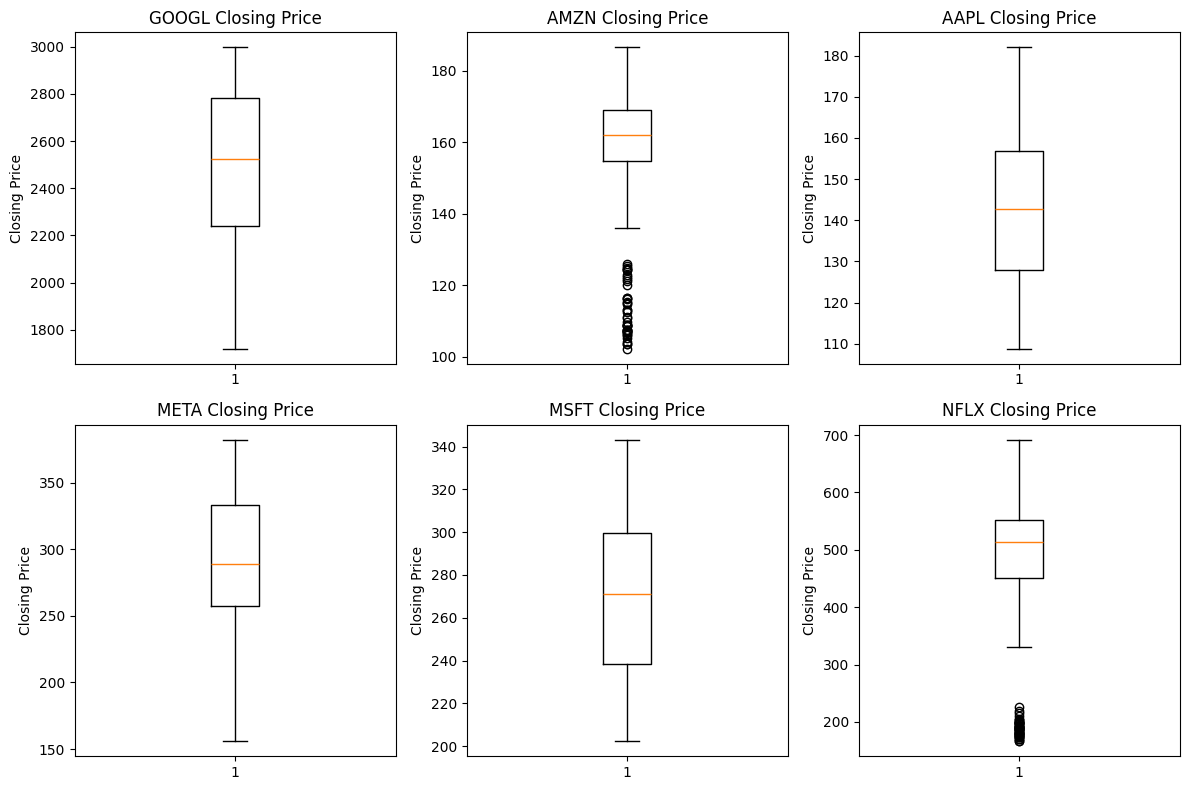

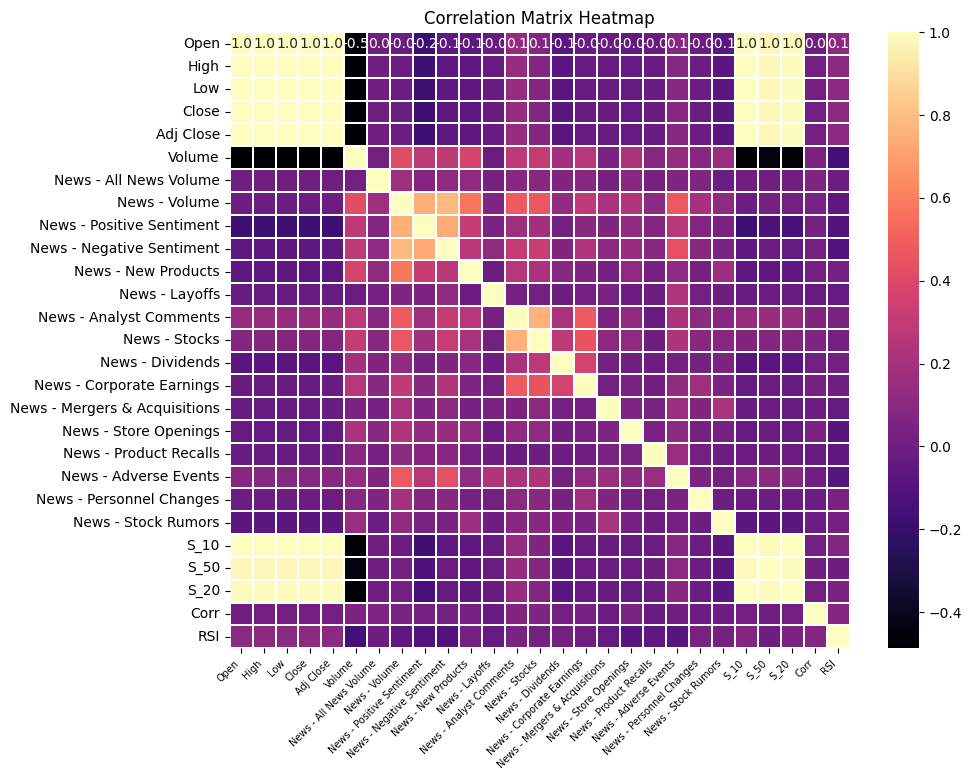

/var/folders/dq/2m2lnnc96gdg8vhnqldpvtww0000gn/T/ipykernel_37701/527029383.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date'] = pd.to_datetime(stock_data['Date'])


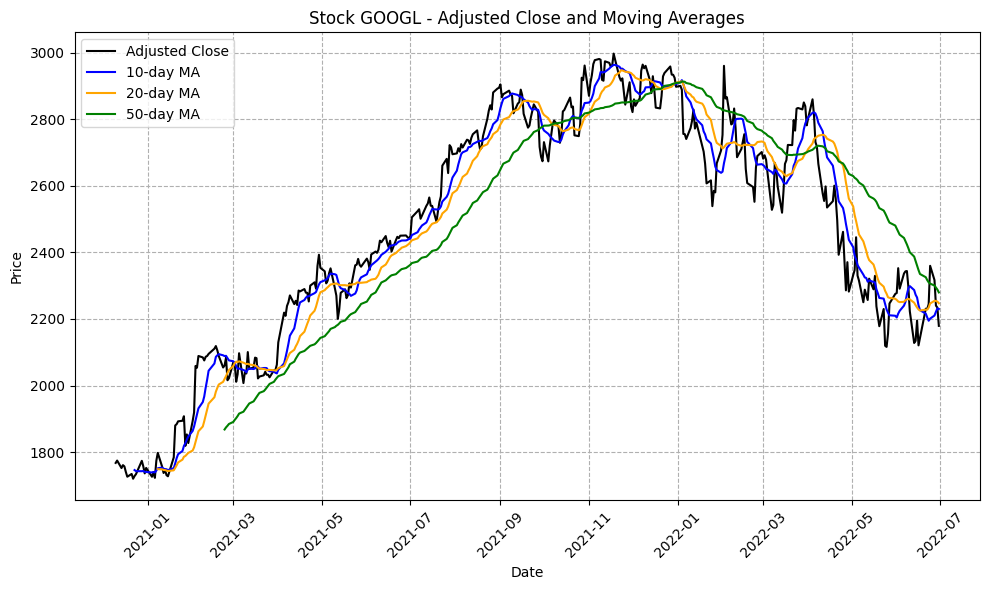

/var/folders/dq/2m2lnnc96gdg8vhnqldpvtww0000gn/T/ipykernel_37701/527029383.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date'] = pd.to_datetime(stock_data['Date'])


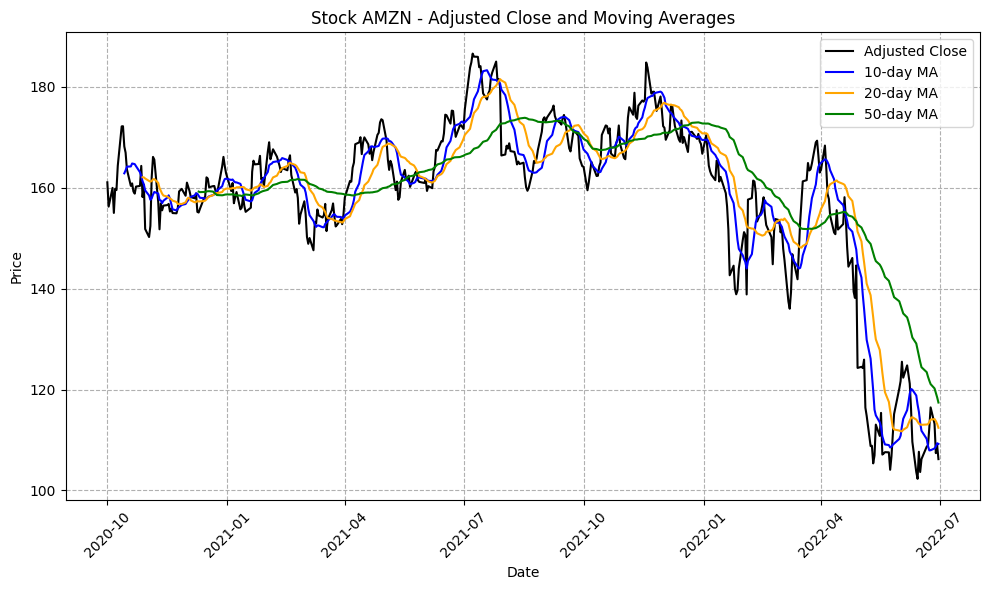

/var/folders/dq/2m2lnnc96gdg8vhnqldpvtww0000gn/T/ipykernel_37701/527029383.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date'] = pd.to_datetime(stock_data['Date'])


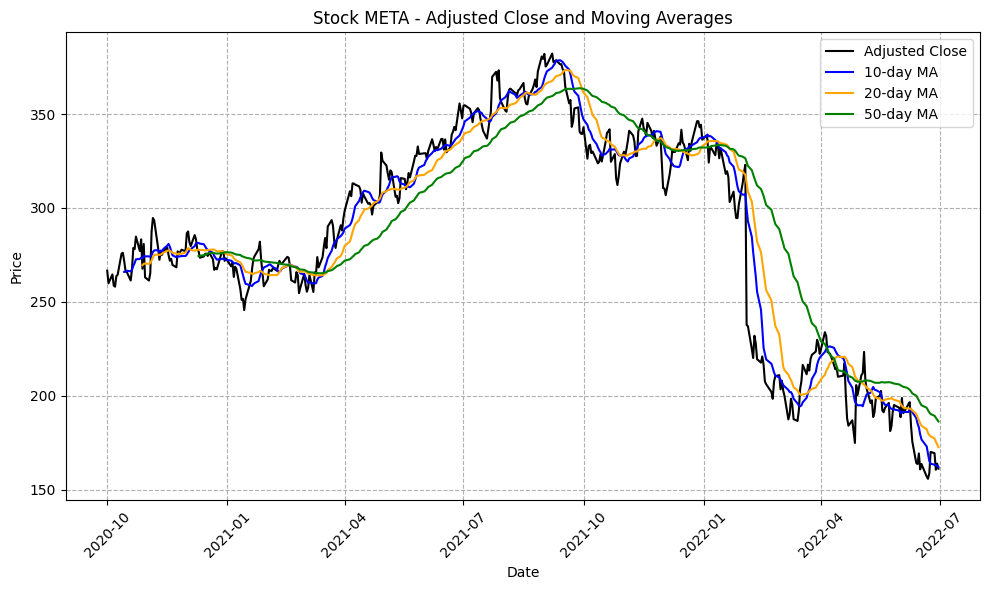

/var/folders/dq/2m2lnnc96gdg8vhnqldpvtww0000gn/T/ipykernel_37701/527029383.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date'] = pd.to_datetime(stock_data['Date'])


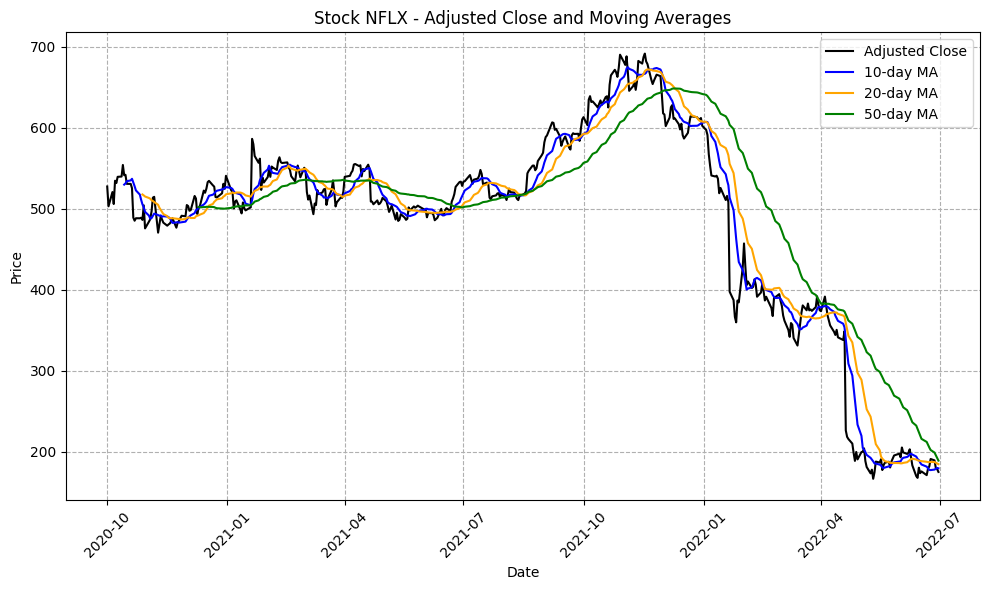

/var/folders/dq/2m2lnnc96gdg8vhnqldpvtww0000gn/T/ipykernel_37701/527029383.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date'] = pd.to_datetime(stock_data['Date'])


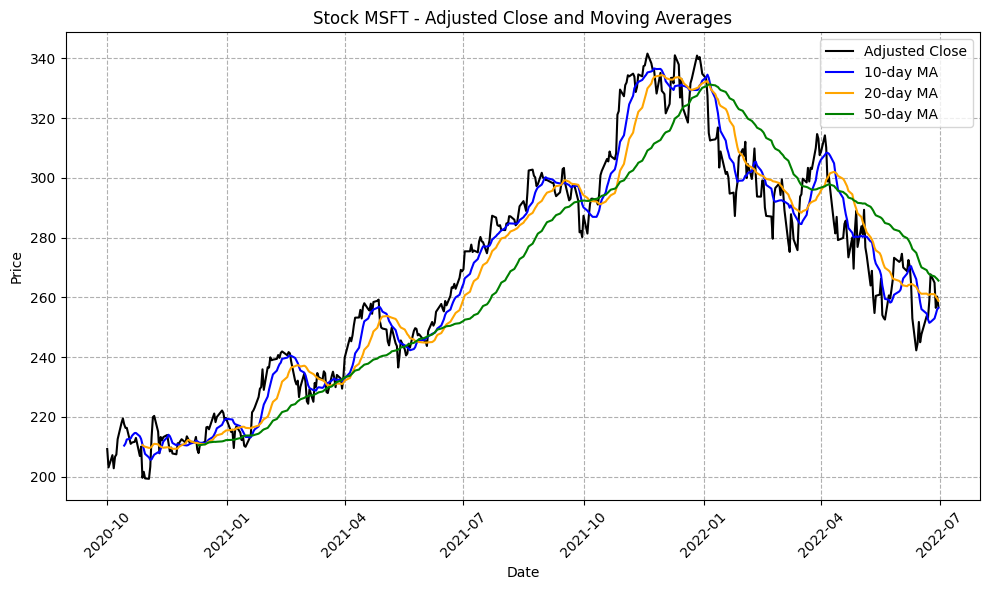

/var/folders/dq/2m2lnnc96gdg8vhnqldpvtww0000gn/T/ipykernel_37701/527029383.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date'] = pd.to_datetime(stock_data['Date'])


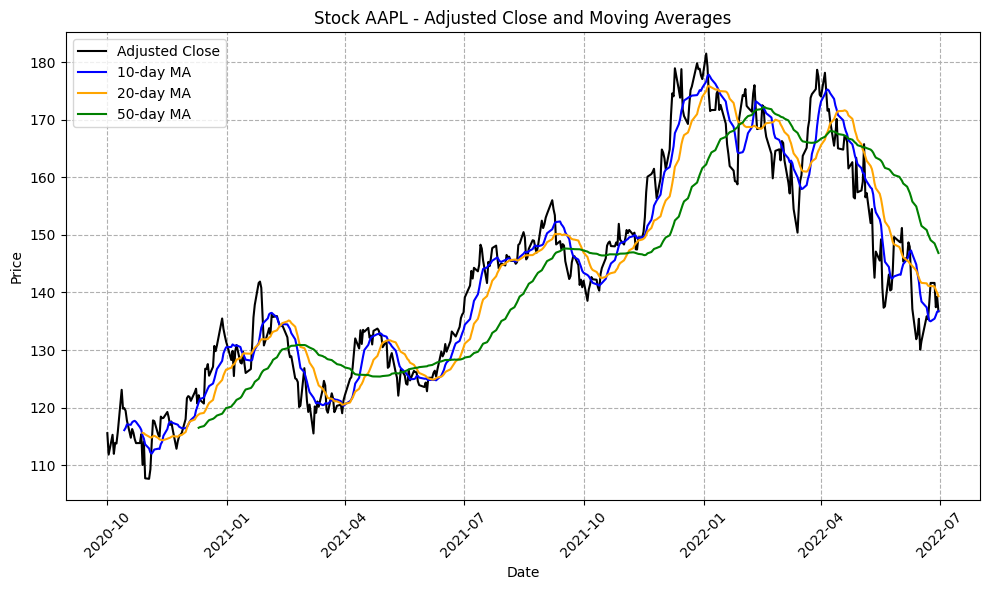

Total Positive Sentiments:
GOOGL: 3.18%
AMZN: 17.76%
META: 0.01%
NFLX: 13.34%
MSFT: 3.73%
AAPL: 10.32%
Total Negative Sentiments:
GOOGL: 3.23%
AMZN: 7.15%
META: 0.06%
NFLX: 5.28%
MSFT: 2.67%
AAPL: 5.05%
The stock with the most positive news sentiment is AMZN with a total positive sentiment of 139298.0.
The stock with the most negative news sentiment is AMZN with a total negative sentiment of 56120.0.


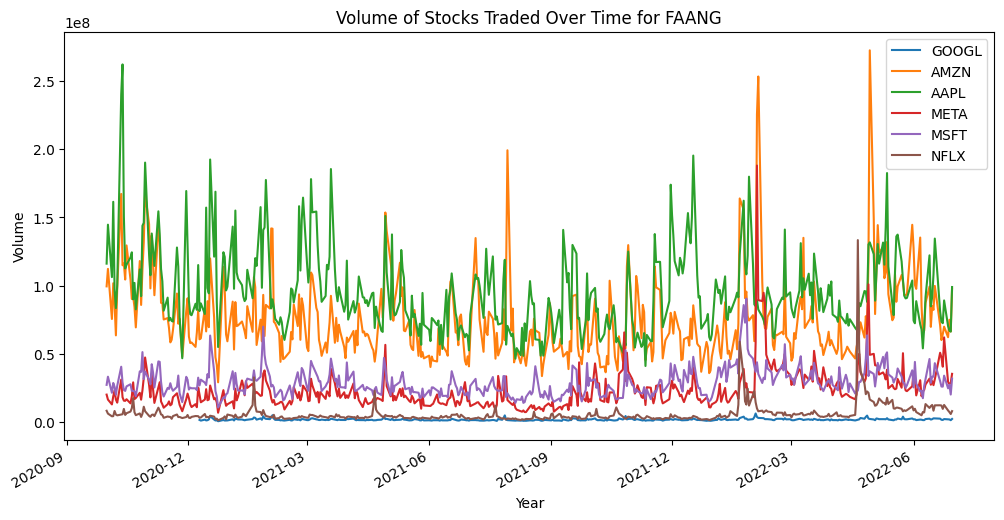

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import talib as ta
import numpy as np
from sklearn.linear_model import LogisticRegression, LinearRegression,Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor,RandomForestRegressor
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV as RSCV
from sklearn.tree import plot_tree
import matplotlib.dates as mdates


# Select only the specified columns for the news data
news_columns = [
    'News - All News Volume', 'News - Volume',
    'News - Positive Sentiment', 'News - Negative Sentiment', 'News - New Products',
    'News - Layoffs', 'News - Analyst Comments', 'News - Stocks', 'News - Dividends',
    'News - Corporate Earnings', 'News - Mergers & Acquisitions', 'News - Store Openings',
    'News - Product Recalls', 'News - Adverse Events', 'News - Personnel Changes',
    'News - Stock Rumors'
]

stock_columns = [
     'Open', 'High', 'Low', 'Close', 'Adj Close','Volume'
]

# Define a list of FAANG stock symbols
faang_stocks = ['GOOGL', 'AMZN', 'META', 'NFLX', 'MSFT', 'AAPL']

def parse_data():
    # Load the data from the CSV file
    data = pd.read_csv('/Users/olivialeighton/Downloads/archive/data.csv')
    faang_stock_data = data[data['Symbol'].isin(faang_stocks)]
    faang_stock_data.to_csv('faang_stock_data.csv', index=False)
    faang_stock_data = faang_stock_data.dropna()
    return faang_stock_data
faang_stock_data = parse_data()

# calculate moving averages, corr and RSI variables for faang stocks
def feature_engineering(faang_stock_data):
    faang_stock_data_copy = faang_stock_data.copy()
    faang_stock_data_copy.loc[:, 'S_10'] = faang_stock_data_copy['Close'].rolling(window=10).mean()
    faang_stock_data_copy.loc[:, 'S_50'] = faang_stock_data_copy['Close'].rolling(window=50).mean()
    faang_stock_data_copy.loc[:, 'S_20'] = faang_stock_data_copy['Close'].rolling(window=20).mean()
    faang_stock_data_copy.loc[:, 'Corr'] = faang_stock_data_copy['Close'].rolling(window=10).corr(faang_stock_data_copy['S_10'])
    faang_stock_data_copy.loc[:, 'RSI'] = ta.RSI(np.array(faang_stock_data_copy['Close']), timeperiod=10)
    # Drop rows with missing values
    faang_stock_data_copy = faang_stock_data_copy.dropna()
    
   
    return faang_stock_data_copy
faang_stock_data = feature_engineering(faang_stock_data)


# The remainder of this code is Exploratory Data Analysis
def box_plots(faang_stock_data):
    faang_stocks = faang_stock_data['Symbol'].unique()
    plt.figure(figsize=(12, 8))
    for i, stock_symbol in enumerate(faang_stocks, start=1):
        plt.subplot(2, 3, i)
        stock_data = faang_stock_data[faang_stock_data['Symbol'] == stock_symbol]
        plt.boxplot(stock_data['Close'])
        plt.title(f'{stock_symbol} Closing Price')
        plt.ylabel('Closing Price')

    plt.tight_layout()
    plt.show()

box_plots(faang_stock_data)

def save_heatmap():
    # Create a DataFrame with the selected columns
    correlation_data = faang_stock_data.select_dtypes(include=['number'])
    # Calculate the correlation matrix
    correlation_matrix = correlation_data.corr()
    # Create a heatmap
    plt.figure(figsize=(10, 8)) 
    heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="magma", fmt=".1f", linewidths=0.3)
    plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees and align them to the right
    plt.title("Correlation Matrix Heatmap")
    
    # Adjust font size for x-axis labels at the top
    heatmap.tick_params(axis='x', which='both', labelsize=7)  # Adjust label size as needed
    plt.show()
save_heatmap()

def plot_stock_data(faang_stock_data):
    for symbol in faang_stocks:
        stock_data = faang_stock_data[faang_stock_data['Symbol'] == symbol]
        # Convert 'Date' column to datetime
        stock_data['Date'] = pd.to_datetime(stock_data['Date'])

        # Calculate moving averages
        stock_data.loc[:, 'S_10'] = stock_data['Adj Close'].rolling(window=10).mean()
        stock_data.loc[:, 'S_20'] = stock_data['Adj Close'].rolling(window=20).mean()
        stock_data.loc[:, 'S_50'] = stock_data['Adj Close'].rolling(window=50).mean()

        # Plotting adjusted closing price and moving averages
        plt.figure(figsize=(10, 6))
        plt.plot(stock_data['Date'], stock_data['Adj Close'], label='Adjusted Close', color='black')
        plt.plot(stock_data['Date'], stock_data['S_10'], label='10-day MA', color='blue')
        plt.plot(stock_data['Date'], stock_data['S_20'], label='20-day MA', color='orange')
        plt.plot(stock_data['Date'], stock_data['S_50'], label='50-day MA', color='green')
        plt.title(f"Stock {symbol} - Adjusted Close and Moving Averages")
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.xticks(rotation=45)
        plt.grid(which='both', linestyle='--')
        plt.tight_layout()
        plt.show()
plot_stock_data(faang_stock_data)


positive_sentiments = {}
negative_sentiments = {}

def positive_vs_negative_sentiment_totals():
    for stock_symbol in faang_stocks:
        stock_data = faang_stock_data[faang_stock_data['Symbol'] == stock_symbol]
        total_positive_sentiment = stock_data['News - Positive Sentiment'].sum()
        total_negative_sentiment = stock_data['News - Negative Sentiment'].sum()
        news_volume = stock_data['News - Volume'].sum()
        positive_sentiments[stock_symbol] = total_positive_sentiment
        negative_sentiments[stock_symbol] = total_negative_sentiment
    print("Total Positive Sentiments:")
    for stock_symbol, total_positive in positive_sentiments.items():
        percent_positive = (total_positive / news_volume) * 100.0
        print(f"{stock_symbol}: {percent_positive:.2f}%")

    print("Total Negative Sentiments:")
    for stock_symbol, total_negative in negative_sentiments.items():
        total_news = positive_sentiments[stock_symbol] + total_negative
        percent_negative = (total_negative / news_volume) * 100.0
        print(f"{stock_symbol}: {percent_negative:.2f}%")

    most_positive_stock = max(positive_sentiments, key=positive_sentiments.get)
    most_negative_stock = max(negative_sentiments, key=negative_sentiments.get)

    print(f"The stock with the most positive news sentiment is {most_positive_stock} with a total positive sentiment of {positive_sentiments[most_positive_stock]}.")
    print(f"The stock with the most negative news sentiment is {most_negative_stock} with a total negative sentiment of {negative_sentiments[most_negative_stock]}.")
positive_vs_negative_sentiment_totals()

def plot_volume(faang_stock_data):
    fig, ax = plt.subplots(figsize=(12, 6))
    faang_stocks = faang_stock_data['Symbol'].unique()

    for stock_symbol in faang_stocks:
        stock_data = faang_stock_data[faang_stock_data['Symbol'] == stock_symbol]
        dates = pd.to_datetime(stock_data['Date'])
        volume = stock_data['Volume']
        ax.plot(dates, volume, label=stock_symbol)

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax.set_xlabel('Year')
    ax.set_ylabel('Volume')
    ax.set_title('Volume of Stocks Traded Over Time for FAANG')
    ax.legend()
    fig.autofmt_xdate()
    plt.show()

# Assuming faang_stock_data is your dataset containing FAANG stock information
plot_volume(faang_stock_data)




In [ ]:
# Linear Regression

def linear_regression_model_per_stock(faang_stock_data):
    faang_stocks = faang_stock_data['Symbol'].unique()
    metrics = [ 'Mean Squared Error']
    color = (0.2, # redness
         0.4, # greenness
         0.2, # blueness
         0.6 # transparency
         ) 

    ridge_metrics = {metric: [] for metric in metrics}
    lasso_metrics = {metric: [] for metric in metrics}

    for stock_symbol in faang_stocks:
        # Filter the data for the specified stock
        stock_data = faang_stock_data[faang_stock_data['Symbol'] == stock_symbol]

        # Specify the columns for the model
        columns = ['Open', 'High', 'Low', 'S_10', 'News - Positive Sentiment', 'News - New Products', 'News - Layoffs', 'News - Analyst Comments', 'News - Negative Sentiment', 'RSI', 'Corr']

        # Select features (X) and target variable (y) for the stock
        X = stock_data[columns]
        y = stock_data['Close']

        # Split the data into training and testing sets
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

        model = LinearRegression()
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        ridge_model = Ridge(alpha=0.5)
        ridge_model.fit(x_train, y_train)
        y_pred_ridge = ridge_model.predict(x_test)
        mse_ridge = mean_squared_error(y_test, y_pred_ridge)
        ridge_metrics['Mean Squared Error'].append(mse_ridge)
        
        lasso_model = Lasso(alpha=0.5)
        lasso_model.fit(x_train, y_train)
        y_pred_lasso = lasso_model.predict(x_test)
        mse_lasso = mean_squared_error(y_test, y_pred_lasso)
        lasso_metrics['Mean Squared Error'].append(mse_lasso)
    bar_width = 0.35
    index = np.arange(len(faang_stocks))

    for metric in metrics:
        plt.figure(figsize=(10, 6))
        plt.bar(index, ridge_metrics[metric], bar_width, label='Ridge (L2)', color='skyblue')
        plt.bar(index + bar_width, lasso_metrics[metric], bar_width, label='Lasso (L1)', color=color)

        plt.xlabel('FAANG Stocks')
        plt.ylabel(metric)
        plt.title(f'{metric} by FAANG Stock (Ridge vs Lasso)')

        plt.xticks(index + bar_width / 2, faang_stocks)
        plt.legend()
        plt.tight_layout()
        plt.show()
        print(ridge_metrics[metric])
        print(lasso_metrics[metric])

# Call the function
linear_regression_model_per_stock(faang_stock_data)


Symbol: GOOGL
Mean AUC: 0.82 ± 0.14
Accuracy: 0.82
Precision: 0.78
Recall: 0.80
F1 Score: 0.79
Confusion Matrix:
[[190  37]
 [ 33 131]]

Symbol: AMZN
Mean AUC: 0.82 ± 0.08
Accuracy: 0.77
Precision: 0.79
Recall: 0.79
F1 Score: 0.79
Confusion Matrix:
[[149  51]
 [ 50 190]]

Symbol: AAPL
Mean AUC: 0.92 ± 0.04
Accuracy: 0.87
Precision: 0.84
Recall: 0.85
F1 Score: 0.85
Confusion Matrix:
[[222  30]
 [ 28 160]]

Symbol: META
Mean AUC: 0.81 ± 0.11
Accuracy: 0.76
Precision: 0.78
Recall: 0.70
F1 Score: 0.74
Confusion Matrix:
[[189  41]
 [ 63 147]]

Symbol: MSFT
Mean AUC: 0.82 ± 0.11
Accuracy: 0.80
Precision: 0.75
Recall: 0.79
F1 Score: 0.77
Confusion Matrix:
[[200  50]
 [ 40 150]]

Symbol: NFLX
Mean AUC: 0.85 ± 0.08
Accuracy: 0.78
Precision: 0.78
Recall: 0.82
F1 Score: 0.80
Confusion Matrix:
[[154  55]
 [ 41 190]]



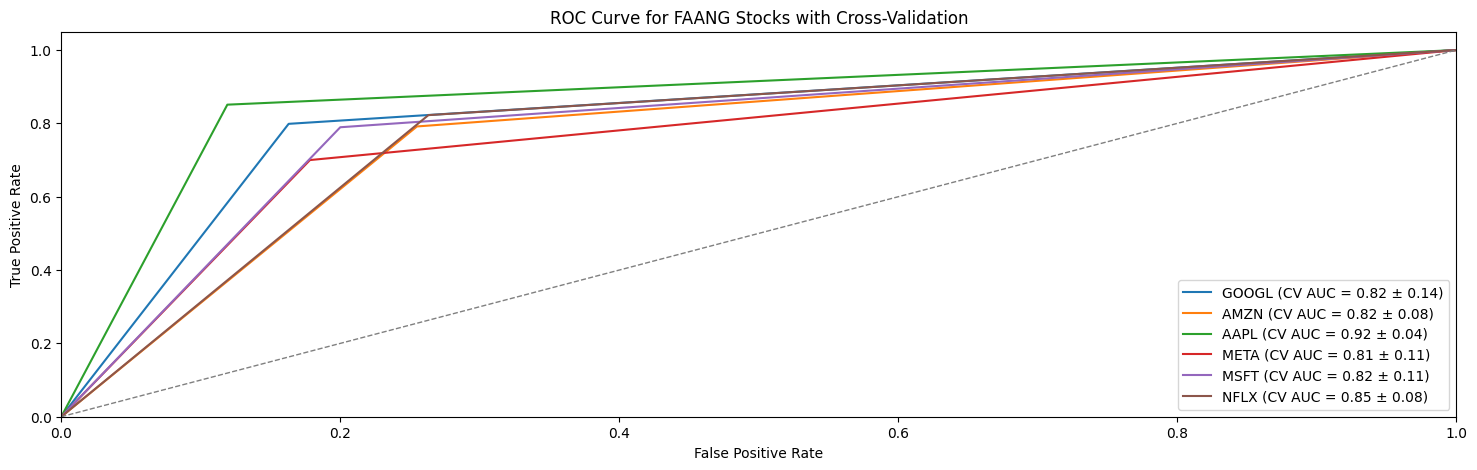

In [116]:
# Logistic Regression
def logistic_regression_model_with_cv(faang_stock_data):
    selected_columns = ['Open', 'High', 'Low', 'S_10', 'News - Positive Sentiment', 'News - New Products', 'News - Layoffs', 'News - Analyst Comments', 'News - Negative Sentiment', 'RSI', 'Corr']
    
    for symbol in faang_stock_data['Symbol'].unique():
        stock_data = faang_stock_data[faang_stock_data['Symbol'] == symbol]
        # moving averages
        MA_20 = stock_data['S_20']
        MA_10 = stock_data['S_10']
        X = stock_data[selected_columns]
        # when 20 day moving average is >= 10 day moving average it indicates a bullish financial pattern
        y = (MA_20 >= MA_10).astype(int)
        # Feature scaling for regularization purposes
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        # Regularized Logistic Regression with L1 regularization (Lasso)
        model_l1 = LogisticRegression(penalty='l1', solver='liblinear')
        # Perform cross-validation
        cv_scores = cross_val_score(model_l1, X_scaled, y, cv=5, scoring='roc_auc')
        mean_auc = cv_scores.mean()
        std_auc = cv_scores.std()
        model_l1.fit(X_scaled, y)
        y_pred_l1 = model_l1.predict(X_scaled)

        # Calculate metrics for L1 Regularization
        fpr_l1, tpr_l1, _ = roc_curve(y, y_pred_l1)
        
        # Calculate additional metrics
        accuracy = accuracy_score(y, y_pred_l1)
        precision = precision_score(y, y_pred_l1)
        recall = recall_score(y, y_pred_l1)
        f1 = f1_score(y, y_pred_l1)
        
        # Confusion matrix
        conf_matrix = confusion_matrix(y, y_pred_l1)

        # Print metrics
        print(f"Symbol: {symbol}")
        print(f"Mean AUC: {mean_auc:.2f} ± {std_auc:.2f}")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"F1 Score: {f1:.2f}")
        print("Confusion Matrix:")
        print(conf_matrix)
        print("")

        # Plot ROC Curve for L1 Regularization with different colors for each stock
        plt.plot(fpr_l1, tpr_l1, label=f'{symbol} (CV AUC = {mean_auc:.2f} ± {std_auc:.2f})')

    # Plotting the baseline (random classifier)
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for FAANG Stocks with Cross-Validation')
    plt.legend(loc='lower right')
    plt.show()

# Assuming faang_stock_data is your dataset containing FAANG stock information
logistic_regression_model_with_cv(faang_stock_data)


MSE for GOOGL: 144.28132128544922
MAE for GOOGL: 8.574435452496017
RMSE for GOOGL: 12.011716000865539
MSE for AMZN: 1.0179194038531842
MAE for AMZN: 0.8409596959252337
RMSE for AMZN: 1.0089199194451381
MSE for AAPL: 0.42107773123948106
MAE for AAPL: 0.5051965448579203
RMSE for AAPL: 0.6489050248221854
MSE for META: 4.49450129024055
MAE for META: 1.6944022875132112
RMSE for META: 2.1200238890730807
MSE for MSFT: 1.8896564502876503
MAE for MSFT: 1.137211415517566
RMSE for MSFT: 1.3746477549858547
MSE for NFLX: 12.325820169571331
MAE for NFLX: 2.6814795589483342
RMSE for NFLX: 3.5108147444106663


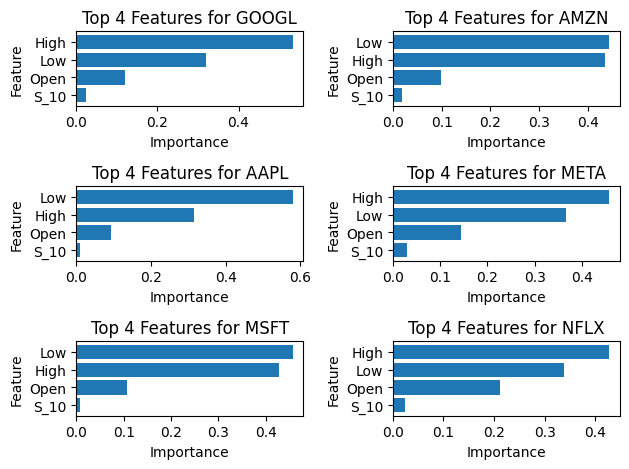

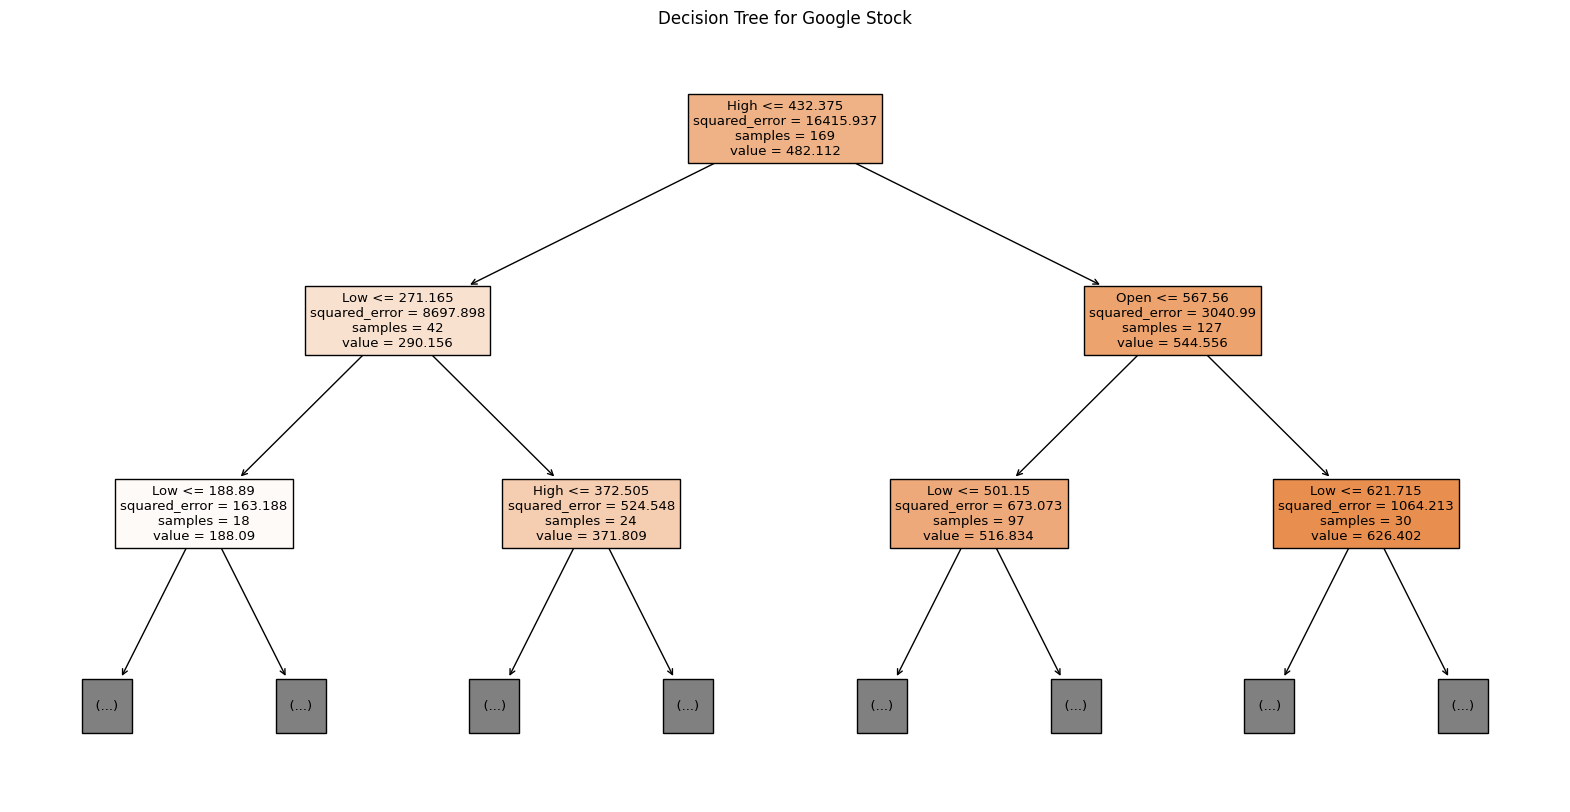

In [98]:

# Random forest 
def random_forest(faang_stock_data):
    selected_columns = ['Open', 'High', 'Low', 'S_10', 'Volume','News - Positive Sentiment', 'News - New Products', 'News - Layoffs', 'News - Analyst Comments', 'News - Negative Sentiment', 'RSI', 'Corr','News - Volume']
    num_symbols = len(faang_stock_data['Symbol'].unique())
    cols = 2  
    rows = (num_symbols // cols) + (num_symbols % cols > 0)  
    
   
    for i, symbol in enumerate(faang_stock_data['Symbol'].unique()):
        stock_data = faang_stock_data[faang_stock_data['Symbol'] == symbol]
        X = stock_data[selected_columns]
        y = stock_data['Close']
        model = RandomForestRegressor(max_depth=3,n_estimators= 200, oob_score = True)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
       
        param_grid = {'n_estimators':np.arange(50,200,15),
                    'max_features':np.arange(0.1, 1, 0.1),
                    'max_depth': [3, 5, 7, 9],
                    'max_samples': [0.3, 0.5, 0.8]}

        model = RSCV(RandomForestRegressor(), param_grid, n_iter = 15).fit(X_train, y_train)
        model = model.best_estimator_
        model.fit(X, y)

        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        
        print(f"MSE for {symbol}: {mse}")
        print(f"MAE for {symbol}: {mae}")
        print(f"RMSE for {symbol}: {rmse}")
        
       
        importances = model.feature_importances_
        std = np.std([tree.feature_importances_ for tree in model.estimators_],
                    axis=0)
        indices = np.argsort(importances)[::-1]

        # Get top 4 important features
        top_features_indices = indices[:4]
        top_features = [selected_columns[index] for index in top_features_indices]
        
        # Plotting the bar chart for top 4 important features
        plt.subplot(rows, cols, i + 1)
        plt.barh(top_features, importances[top_features_indices])
        plt.title(f"Top 4 Features for {symbol}")
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.gca().invert_yaxis()

    plt.tight_layout()
    plt.show()
    plt.figure(figsize=(20, 10))
    plot_tree(model.estimators_[0], feature_names=selected_columns, filled=True, max_depth=2)
    plt.title('Decision Tree for Google Stock')
    plt.show()
    
# Assuming faang_stock_data is your dataset containing FAANG stock information
random_forest(faang_stock_data)

In [118]:
# LSTM model with different Epochs 

# Assuming you have the selected_columns and X, y prepared from your data
selected_columns = ['Open', 'High', 'Low', 'S_10', 'News - Positive Sentiment', 'News - New Products', 'News - Layoffs', 'News - Analyst Comments', 'News - Negative Sentiment', 'RSI', 'Corr']
stock_data = faang_stock_data[faang_stock_data['Symbol'] == "GOOGL"]

X = stock_data[selected_columns]
y = stock_data['Close']

# Scale the features
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

# Define the train-test split ratio
train_ratio = 0.75
train_size = int(len(X) * train_ratio)
losses = []
epochs = [10, 20, 30, 40, 50,60,70]
# Split the data into train and test sets
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape the data for LSTM input [samples, time steps, features]
time_steps = 15  # You may adjust this value based on your sequence length
def prepare_lstm_data(data, time_steps):
    X_lstm, y_lstm = [], []
    for i in range(len(data) - time_steps):
        X_lstm.append(data[i:(i + time_steps)])
        y_lstm.append(data[i + time_steps])
    return np.array(X_lstm), np.array(y_lstm)

X_train_lstm, y_train_lstm = prepare_lstm_data(X_train, time_steps)
X_test_lstm, y_test_lstm = prepare_lstm_data(X_test, time_steps)


for epoch_value in epochs:
    # Re-creating the model for each epoch value
    model = Sequential()
    model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(units=75))
    model.add(Dropout(0.2))
    model.add(Dense(units=1, activation='linear'))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model for the current epoch value
    history = model.fit(X_train_lstm, y_train_lstm, epochs=epoch_value, batch_size=64, validation_data=(X_test_lstm, y_test_lstm), verbose=0)

    # Evaluate the model on test data
    test_loss = model.evaluate(X_test_lstm, y_test_lstm)
    print(f"Test Loss for {epoch_value} epochs:", test_loss)

    # Store the validation loss for plotting
    losses.append(history.history['val_loss'])

# Plotting Training and Validation Loss for each epoch value
for i, loss in enumerate(losses):
    plt.plot(loss, label=f'Epochs: {epochs[i]}')

plt.legend()
plt.title('Validation Loss for Different Epoch Values')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

NameError: name 'MinMaxScaler' is not defined